In [1]:
import pandas as pd
import numpy as np

import nltk
from konlpy.tag import Twitter
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
# 데이터 불러오기
df = pd.read_excel('./data/result_vaccine_220118_1800.xlsx') 
df.head()

,Title,Date,Article,URL,PressCompany
0,백신 부작용 학생에 최대 500만원 지원…심리위기엔 600만원,2022.01.18. 오전 11:21,이상반응 신고율 0.27%…인과성 인정 어려워 국가보상 못받는 학생 지원정신건강 관...,https://news.naver.com/main/read.naver?mode=LS...,연합뉴스
1,"'30만원 이하' 백신 피해보상, 지자체가 결정한다",2022.01.18. 오전 10:00,기사내용 요약피해보상금 30만원 이하인 경우시·도에서 인과성 심의→보상 결정[세종=...,https://news.naver.com/main/read.naver?mode=LS...,뉴시스
2,"이스라엘 연구진 ""백신 4차 접종, 오미크론에 효과 크지 않아""",2022.01.18. 오전 7:11,이스라엘의 한 여성이 코로나19 백신을 접종받고 있는 모습. 〈사진-로이터·연합뉴...,https://news.naver.com/main/read.naver?mode=LS...,JTBC
3,국산 코로나19 백신 9부 능선 넘었다…임상 3상 참여자 모집 완료,2022.01.18. 오전 10:31,"코로나19 백신·치료제 TF 회의 한국 , 태국, 필리핀 등 6개국 약 4000여...",https://news.naver.com/main/read.naver?mode=LS...,조선비즈
4,SK바사 코로나19 백신 임상 3상 8부 능선… '오미크론 효능'은,2022.01.18. 오전 11:42,대상자 4037명 모집 완료올 상반기 중 허가 목표초기 대응용… 추가 개발 시급SK...,https://news.naver.com/main/read.naver?mode=LS...,아시아경제신문


In [3]:
articles = df['Article'].tolist()

# 기사 이어 붙이기
articles = ' '.join(articles)

len(articles), articles[:5000]

(54449,
 '이상반응 신고율 0.27%…인과성 인정 어려워 국가보상 못받는 학생 지원정신건강 관심군 4.6%·극단선택 학생↑…24시간 상담·전문 의료서비스코로나19 백신접종 받는 학생들[연합뉴스 자료사진]    (서울=연합뉴스) 김지연 기자 = 코로나19 유행이 장기화하는 가운데 정부가 극심한 불안, 우울에 시달리는 학생들의 심리 회복과 백신 중증 이상반응을 겪는 학생들의 치료에 각각 최대 600만원, 500만원을 지원한다.    유은혜 부총리 겸 교육부 장관은 18일 정부세종청사에서 이같은 내용의 \'코로나19 극복을 위한 학생 건강회복 지원방안\'을 발표했다.  백신 이상반응 신고율 0.27%…국가보상 못 받는 경우 지원    접종 당시 만 18세 이하 학생 중 접종 이후 90일 내 중증 이상반응이 발생했으나 인과성이 인정되기 어려워 국가 보상을 받지 못할 때 보완적 의료비가 500만원 내로 지원된다.    \'중증\'은 증상 유형과 관계없이 국가보상 신청 액수가 본인부담금 기준 30만 원 이상일 경우이며, 국가 보상제도에 따른 예방접종피해보상 전문위원회 심의에서 기각된 사례에 해당한다.    교육부는 국내 백신접종 이상반응 의심사례가 접종 후 72일까지 신고되고 있는 점 등을 고려해 기간을 접종 후 90일 내로 정했다고 설명했다.    17일 기준 13∼18세 접종률은 1차 78.6%, 2차 66.5%다.    1, 2차를 통틀어 전체 402만1천208건 중 이상반응 의심사례는 1만915건(0.27%) 신고됐으며 그중 사망이나 아나필락시스 의심, 중환자실 입원, 영구장애 등 중대한 이상반응 신고 건수는 284건이다.    본인이나 보호자가 교육부가 지정한 위탁기관인 한국교육환경보호원에 의료비 영수증을 포함한 신청서를 제출하면 된다.    개인별 총액 500만 원 한도이나 교육급여(중위소득 50% 이하) 대상자 중 의료비 총액이 500만 원을 초과하면 최대 1천만 원 한도에서 지원이 가능하다.    국가보상제도 신청부터 통보까지 소요되는 기간이 최장 

In [4]:
# norm == 정규화(normalization)
# stem == 어근화(stemming)

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('이상', 'Noun'),
 ('반응', 'Noun'),
 ('신고', 'Noun'),
 ('율', 'Noun'),
 ('0.27%', 'Number'),
 ('…', 'Foreign'),
 ('인과성', 'Noun'),
 ('인정', 'Noun'),
 ('어렵다', 'Adjective'),
 ('국가', 'Noun'),
 ('보상', 'Noun'),
 ('못', 'VerbPrefix'),
 ('받다', 'Verb'),
 ('학생', 'Noun'),
 ('지원', 'Noun'),
 ('정신건강', 'Noun'),
 ('관심', 'Noun'),
 ('군', 'Suffix'),
 ('4.6%', 'Number'),
 ('·', 'Foreign'),
 ('극단', 'Noun'),
 ('선택', 'Noun'),
 ('학생', 'Noun'),
 ('↑', 'Foreign'),
 ('…', 'Punctuation'),
 ('24시간', 'Number'),
 ('상담', 'Noun'),
 ('·', 'Punctuation'),
 ('전문', 'Noun'),
 ('의료', 'Noun'),
 ('서비스', 'Noun'),
 ('코로나', 'Noun'),
 ('19', 'Number'),
 ('백신', 'Noun'),
 ('접종', 'Noun'),
 ('받다', 'Verb'),
 ('학생', 'Noun'),
 ('들', 'Suffix'),
 ('[', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 ('자료', 'Noun'),
 ('사진', 'Noun'),
 (']', 'Punctuation'),
 ('(', 'Punctuation'),
 ('서울', 'Noun'),
 ('=', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 (')', 'Punctuation'),
 ('김지연', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('코로나', 'Noun'),
 ('19', 'Number'),
 ('유행

In [5]:
# 제외하고자 하는 단어 리스트
del_list = ['하다', '있다', '없다', '되다', '이다', '돼다', '않다', '그렇다', '맞다', '아니다', '이렇다', '어떻다'
           , '들어가다', '드러나다', '연합뉴스', '기자', '뉴스', '대해', '관련', '가다', '보다', '사진', '아스', '진자']

In [6]:
# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 됩니다.
word_cleaned = []

for word in raw_pos_tagged: # ('서울', 'Noun'),
    
    if word[1] not in ["Josa", "Eomi", "Punctuation", "Foreign", "Number"]:
    # Foreign == ”, “ 와 같이 제외되어야 할 항목 (조사, 어미, 구두점)
        
        if (len(word[0]) != 1) and (word[0] not in del_list): 
        # 한 글자로 이뤄진 단어들을 제외, 원치 않는 단어들을 제외            
            word_cleaned.append(word[0])
            # append를 통한 빈 리스트에 추가
        
word_cleaned

['이상',
 '반응',
 '신고',
 '인과성',
 '인정',
 '어렵다',
 '국가',
 '보상',
 '받다',
 '학생',
 '지원',
 '정신건강',
 '관심',
 '극단',
 '선택',
 '학생',
 '상담',
 '전문',
 '의료',
 '서비스',
 '코로나',
 '백신',
 '접종',
 '받다',
 '학생',
 '자료',
 '서울',
 '김지연',
 '코로나',
 '유행',
 '장기',
 '화하다',
 '가운데',
 '정부',
 '극심하다',
 '불안',
 '우울',
 '시달리다',
 '학생',
 '심리',
 '회복',
 '백신',
 '중증',
 '이상',
 '반응',
 '겪다',
 '학생',
 '치료',
 '각각',
 '최대',
 '지원',
 '유은혜',
 '부총리',
 '교육부',
 '장관',
 '정부',
 '세종',
 '청사',
 '같다',
 '내용',
 '코로나',
 '극복',
 '학생',
 '건강',
 '회복',
 '지원',
 '방안',
 '발표',
 '백신',
 '이상',
 '반응',
 '신고',
 '국가',
 '보상',
 '받다',
 '경우',
 '지원',
 '접종',
 '당시',
 '이하',
 '학생',
 '접종',
 '이후',
 '중증',
 '이상',
 '반응',
 '발생',
 '인과성',
 '인정',
 '어렵다',
 '국가',
 '보상',
 '받다',
 '보완',
 '의료',
 '지원',
 '중증',
 '증상',
 '유형',
 '관계없이',
 '국가',
 '보상',
 '신청',
 '액수',
 '인부',
 '담그다',
 '기준',
 '이상일',
 '경우',
 '국가',
 '보상',
 '제도',
 '따르다',
 '예방접종',
 '피해',
 '보상',
 '전문',
 '위원회',
 '심의',
 '기각',
 '사례',
 '해당',
 '교육부',
 '국내',
 '백신',
 '접종',
 '이상',
 '반응',
 '의심',
 '사례',
 '접종',
 '신고',
 '고려',
 '기간',
 '접종',
 '설명',
 '기준',
 '접종',
 '통틀어

In [7]:
# Counter 함수를 사용하여 word_cleaned 안의 리스트와 갯수를와 갯수를 딕셔너리화 함
result = Counter(word_cleaned)
word_dic = dict(result)

word_dic

{'이상': 85,
 '반응': 61,
 '신고': 14,
 '인과성': 15,
 '인정': 16,
 '어렵다': 19,
 '국가': 43,
 '보상': 47,
 '받다': 85,
 '학생': 63,
 '지원': 74,
 '정신건강': 21,
 '관심': 5,
 '극단': 4,
 '선택': 5,
 '상담': 7,
 '전문': 6,
 '의료': 54,
 '서비스': 8,
 '코로나': 166,
 '백신': 404,
 '접종': 269,
 '자료': 12,
 '서울': 32,
 '김지연': 1,
 '유행': 2,
 '장기': 7,
 '화하다': 11,
 '가운데': 17,
 '정부': 86,
 '극심하다': 1,
 '불안': 5,
 '우울': 6,
 '시달리다': 1,
 '심리': 11,
 '회복': 21,
 '중증': 19,
 '겪다': 5,
 '치료': 45,
 '각각': 4,
 '최대': 19,
 '유은혜': 7,
 '부총리': 16,
 '교육부': 34,
 '장관': 18,
 '세종': 9,
 '청사': 7,
 '같다': 14,
 '내용': 14,
 '극복': 5,
 '건강': 18,
 '방안': 18,
 '발표': 21,
 '경우': 22,
 '당시': 10,
 '이하': 13,
 '이후': 21,
 '발생': 22,
 '보완': 7,
 '증상': 11,
 '유형': 2,
 '관계없이': 1,
 '신청': 19,
 '액수': 2,
 '인부': 3,
 '담그다': 3,
 '기준': 19,
 '이상일': 1,
 '제도': 33,
 '따르다': 61,
 '예방접종': 21,
 '피해': 18,
 '위원회': 7,
 '심의': 7,
 '기각': 6,
 '사례': 15,
 '해당': 7,
 '국내': 20,
 '의심': 10,
 '고려': 7,
 '기간': 13,
 '설명': 20,
 '통틀어': 1,
 '전체': 7,
 '그중': 1,
 '사망': 16,
 '아나필락시스': 1,
 '중환자실': 2,
 '입원': 8,
 '영구': 2,
 '장애': 2,
 '중대

In [8]:
# 딕셔너리를 튜플로 만든 후 lambda 함수를 사용해 내림차순 정렬
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

sorted_word_dic

[('백신', 404),
 ('접종', 269),
 ('코로나', 166),
 ('패스', 96),
 ('정부', 86),
 ('이상', 85),
 ('받다', 85),
 ('지원', 74),
 ('방역', 65),
 ('학생', 63),
 ('반응', 61),
 ('따르다', 61),
 ('의료', 54),
 ('적용', 50),
 ('조코비치', 50),
 ('보상', 47),
 ('치료', 45),
 ('오미크론', 44),
 ('국가', 43),
 ('밝히다', 42),
 ('청소년', 42),
 ('검사', 40),
 ('호주', 38),
 ('대상', 37),
 ('감염', 37),
 ('현지', 36),
 ('개발', 36),
 ('교육부', 34),
 ('제도', 33),
 ('서울', 32),
 ('위해', 31),
 ('지난', 30),
 ('가짜', 30),
 ('추가', 29),
 ('이탈리아', 29),
 ('시간', 28),
 ('대한', 27),
 ('확산', 26),
 ('결정', 26),
 ('확인', 26),
 ('바이오', 25),
 ('사람', 25),
 ('일본', 25),
 ('오다', 24),
 ('시행', 24),
 ('SK', 24),
 ('의무', 24),
 ('지난해', 23),
 ('현재', 23),
 ('세계', 23),
 ('예정', 23),
 ('프랑스', 23),
 ('도입', 23),
 ('경우', 22),
 ('발생', 22),
 ('관리', 22),
 ('환자', 22),
 ('입국', 22),
 ('조치', 22),
 ('시설', 22),
 ('그린', 22),
 ('주사기', 22),
 ('경찰', 22),
 ('정신건강', 21),
 ('회복', 21),
 ('발표', 21),
 ('이후', 21),
 ('예방접종', 21),
 ('이번', 21),
 ('사이언스', 21),
 ('계획', 21),
 ('세포', 21),
 ('질환', 21),
 ('국내', 20),
 ('설명', 20),
 

### '백신'에 대한 기사 내 단어 빈도수 시각화 _ 막대그래프

In [9]:
# 폰트 설정
%matplotlib inline
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

In [10]:
# 막대그래프 시각화는 NLTK 라이브러리만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행
word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution

word_frequency

FreqDist({'백신': 404, '접종': 269, '코로나': 166, '패스': 96, '정부': 86, '이상': 85, '받다': 85, '지원': 74, '방역': 65, '학생': 63, ...})

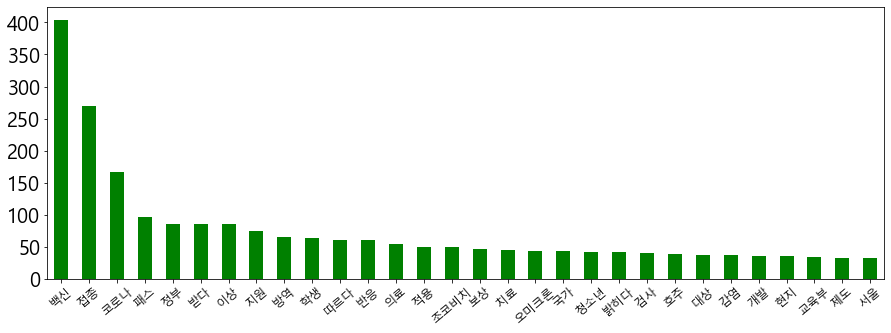

In [11]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 내림차순 정렬
result = df.sort_values([0], ascending=False)

# 상위 30개
result = result[:30]

# 막대 그래프
result.plot(kind='bar', legend=False, figsize=(15,5), color='g') # 'bar' graph
plt.xticks(fontsize =12, rotation=40)
plt.yticks(fontsize =20)
plt.savefig('./image/vaccine_bargraph.png')
plt.show()

### '백신'에 대한 기사 내 단어 빈도수 시각화 _ word cloud

In [12]:
# masking을 위한 vaccine.png 불러오기
vaccine_coloring = np.array(Image.open('./image/vaccine.png'))
image_colors = ImageColorGenerator(vaccine_coloring)
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,
                       mask=vaccine_coloring,
                       max_words=10000,
                       prefer_horizontal= 1.0,
                       background_color='white').generate_from_frequencies(word_dic)

In [13]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

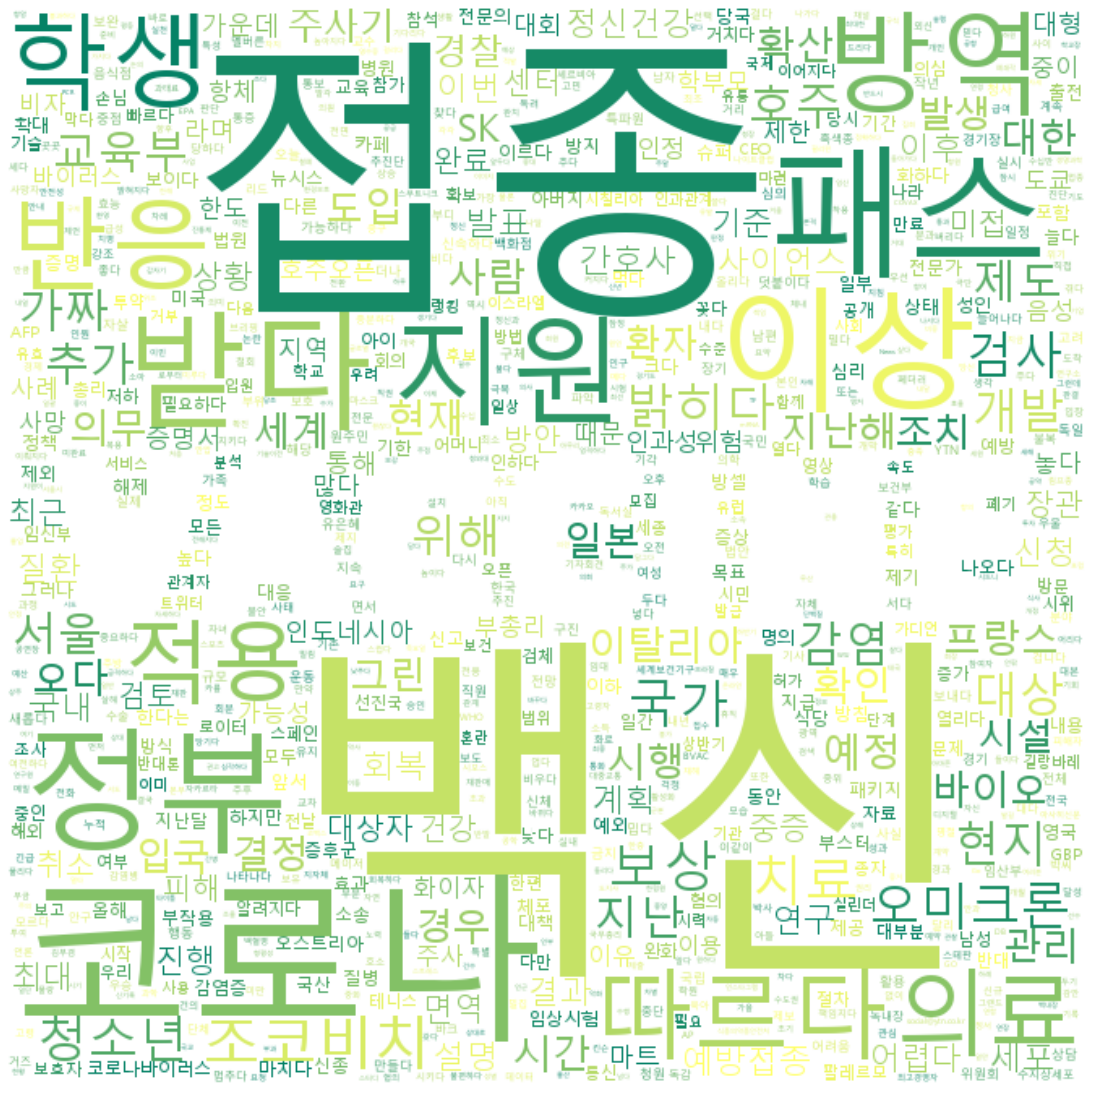

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(colormap='summer'), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
word_cloud.to_file("./image/vaccine_wordcloud.png")

### resize

In [16]:
im = Image.open("./image/vaccine_wordcloud.png")
im.resize((666, 666))
im.save("./image/vaccine_wordcloud.png")